# Ford Go-Bive Exploration Analysis Summary
## Abdulmuiz Adebowale

## Investigation Overview
> In this inquiry, I wanted to look at how the length of journeys varies depending on DateTime and the type of customer. Hours of the day, days of the week, and customer type were given the most attention.

## Dataset Overview

> The information relates to over 183,000 trips taken in a bike-sharing program that serves the larger San Francisco Bay area. In addition to other variables like the member's year of birth, start and finish station names, start and end station longitude and latitude, start and end station unique id, and others, the data characteristics include duration (secs) and others like DateTime, customer type, and gender. A total of 8000 data points were dropped from the study because of errors or missing data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
gobike = pd.read_csv('201902-fordgobike-tripdata.csv')
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
gobike.dropna(inplace=True)

gobike['start_time'] = pd.to_datetime(gobike['start_time'])
gobike['end_time'] = pd.to_datetime(gobike['end_time'])

gobike['bike_id'] = gobike.bike_id.astype(str)


import datetime as dt
gobike['start_day'] = gobike['start_time'].dt.day_name()
gobike['start_month'] = gobike['start_time'].dt.month_name()

# bike['start_year'] = bike['start_time'].dt.year
gobike['start_hr'] = gobike['start_time'].dt.hour
gobike['start_hr'] = gobike.start_hr.astype(str)


gobike['end_day'] = gobike['end_time'].dt.day_name()
gobike['end_month'] = gobike['end_time'].dt.month_name()
gobike['end_hr'] = gobike['end_time'].dt.hour
gobike['end_hr'] = gobike.end_hr.astype(str)

In [4]:
# convert the days and hours into orderly categorical types
ordinal_var_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                   'start_hr': [str(i) for i in range(0,24)],
                   'end_hr': [str(i) for i in range(0,24)]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    gobike[var] = gobike[var].astype(ordered_var)

## Frequency of Rides Per Day
Most rides were taken on Tuesdays and Thursdays. Saturday and Sunday have the lowest trip records.

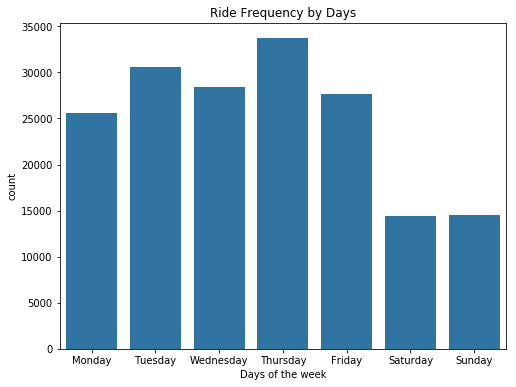

In [5]:
d_colour = sb.color_palette()[0]

plt.figure(figsize = (8,6))
sb.countplot(data = gobike, x = 'start_day', color = d_colour)
plt.xlabel('Days of the week')
plt.title('Ride Frequency by Days');

## Visualization for the amount of trips taken per hour

> The 8th, 9th, 17th, and 18th hours have the greatest trip records for the days as observed. This can be attributed to morning rush hour, so it is to be expected.

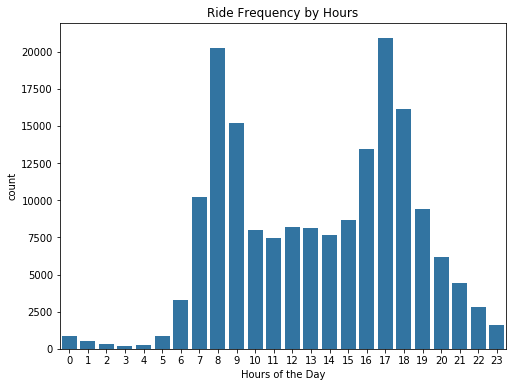

In [6]:
plt.figure(figsize = (8,6))
sb.countplot(data = gobike, x = 'start_hr', color = d_colour)
plt.xlabel('Hours of the Day')
plt.title('Ride Frequency by Hours');

## Frequency of Rides Per Gender

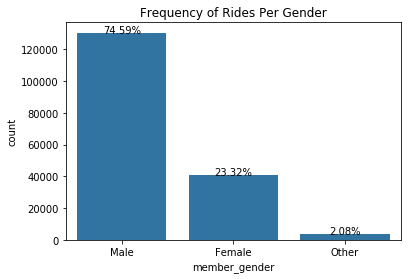

In [7]:
gen_bike = gobike.member_gender.value_counts().index
rfg = sb.countplot(data = gobike, x = 'member_gender',  color=sb.color_palette()[0], order = gen_bike)

total = len(gobike)
for p in rfg.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    rfg.annotate(percentage, (x, y),ha='center')
    
plt.title('Frequency of Rides Per Gender')
plt.show();

## Trip Length by Customer Type and Weekdays

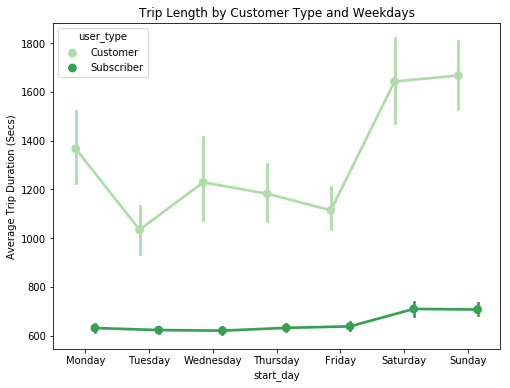

In [8]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = gobike, x="start_day", y = "duration_sec",  hue = 'user_type',
           palette = 'Greens', dodge = 0.3 )
plt.title('Trip Length by Customer Type and Weekdays')
plt.ylabel('Average Trip Duration (Secs)')
plt.show();

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
!jupyter nbconvert 'Ford_Go-Bike_Exploration_Analysis_Presentation.ipynb' --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Ford_Go-Bike_Exploration_Analysis_Presentation.ipynb to slides
[NbConvertApp] Writing 360450 bytes to Ford_Go-Bike_Exploration_Analysis_Presentation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Ford_Go-Bike_Exploration_Analysis_Presentation.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: g